In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
train = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/train_LbELtWX/train.csv')
test = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/test_ScVgIM0/test.csv')

sample_submission = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/sample_submission_I5njJSF.csv')

In [3]:
train.shape

(60000, 2)

In [4]:
test.shape

(10000, 1)

In [5]:
sample_submission.head()

,id,label
0,60001,0
1,60002,0
2,60003,0
3,60004,0
4,60005,0


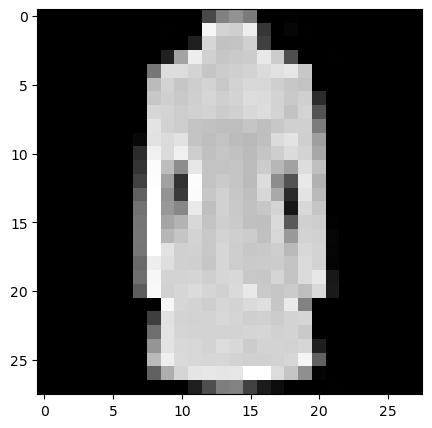

In [5]:
work_path = '/mnt/c/Users/ouyangkang/Desktop/'
seed = 1288
rng = np.random.RandomState(seed)

image_name = rng.choice(train['id'])
file_path = work_path + 'train_LbELtWX/train/' + str(image_name) + '.png'

img = cv2.imread(file_path, 0)
img = img.astype('float32')

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')

In [6]:
img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  73., 129., 146., 123.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0., 245., 211., 207., 238.,  54.,   0.,   6.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         31., 214., 194., 195., 208.,  64.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  32., 163.,
        237., 208., 198., 202., 204., 232., 204.,  79.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 118., 221., 220.,
        211., 197., 204., 207., 211., 219., 225., 230., 199.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [7]:
img.shape

(28, 28)

In [8]:
data_path = '/mnt/c/Users/ouyangkang/Desktop/train_LbELtWX/train/'

In [9]:
train_x = [cv2.imread(data_path + sample, 0) for sample in os.listdir(data_path)]

In [10]:
train_x = np.asarray(train_x)
train_x = train_x.astype('float32')

In [11]:
train_x.shape

(60000, 28, 28)

In [12]:
train_x = train_x/train_x.max()
train_x = train_x.reshape(-1, 28*28)
train_x.shape

(60000, 784)

In [13]:
train_y = train['label'].values

In [14]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, stratify=train_y)
print(train_x.shape, train_y.shape, val_x.shape, val_y.shape)

(54000, 784) (54000,) (6000, 784) (6000,)


In [15]:
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential
from torch.optim import Adam

In [16]:
input_num_units = 28*28
hidden_num_units = 500
output_num_units = 10

epochs = 20
learning_rate = 0.0005

In [17]:
model = Sequential(Linear(input_num_units, hidden_num_units),
                    ReLU(),
                    Linear(hidden_num_units, output_num_units))

loss_fn = CrossEntropyLoss()

optimizer = Adam(model.parameters(), lr = learning_rate)

In [18]:
train_losses, val_losses = [], []
for epoch in range(epochs):
    avg_cost = 0

    x, y = Variable(torch.from_numpy(train_x)), Variable(torch.from_numpy(train_y), requires_grad=False)
    x_val, y_val = Variable(torch.from_numpy(val_x)), Variable(torch.from_numpy(val_y), requires_grad=False)
    pred = model(x)
    pred_val = model(x_val)

    loss = loss_fn(pred, y)
    loss_val = loss_fn(pred_val, y_val)
    train_losses.append(loss)
    val_losses.append(loss_val)

    loss.backward()
    optimizer.step()
    avg_cost = avg_cost + loss.data

    if (epoch%2 != 0):
        print(epoch+1, avg_cost)

2 tensor(2.3148)
4 tensor(2.3050)
6 tensor(2.3250)
8 tensor(2.3141)
10 tensor(2.3088)
12 tensor(2.3117)
14 tensor(2.3152)
16 tensor(2.3183)
18 tensor(2.3197)
20 tensor(2.3174)


In [19]:
train_losses = [i.detach().numpy() for i in train_losses]
val_losses = [i.detach().numpy() for i in val_losses]

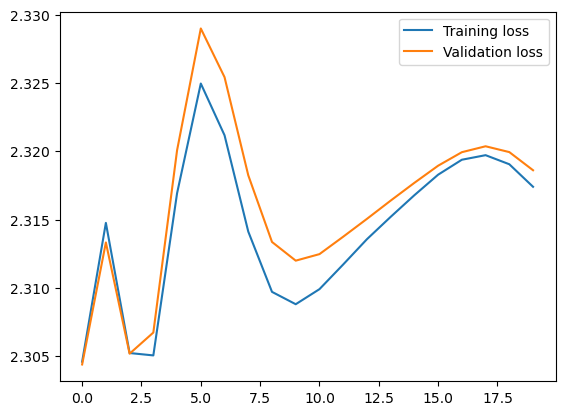

In [20]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [21]:
# get training accuracy
from sklearn.metrics import accuracy_score

x, y = Variable(torch.from_numpy(train_x)), Variable(torch.from_numpy(train_y), requires_grad=False)
pred = model(x)

final_pred = np.argmax(pred.data.numpy(), axis=1)

accuracy_score(train_y, final_pred)

0.10440740740740741

In [22]:
# get validation accuracy
x, y = Variable(torch.from_numpy(val_x)), Variable(torch.from_numpy(val_y), requires_grad=False)
pred = model(x)
final_pred = np.argmax(pred.data.numpy(), axis=1)

accuracy_score(val_y, final_pred)

0.10316666666666667

In [23]:
# loading test images
test_img = []
for img_name in test['id']:
    image_path = '/mnt/c/Users/ouyangkang/Desktop/test_ScVgIM0/test/' + str(img_name) + '.png'
    img = cv2.imread(image_path, 0)
    img = img.astype('float32')
    test_img.append(img)

test_x = np.array(test_img)
test_x.shape

(10000, 28, 28)

In [76]:
# converting the images to 1-D
test_x = test_x/train_x.max()
test_x = test_x.reshape(-1, 28*28).astype('float32')
test_x.shape

(10000, 784)

In [77]:
# getting the prediction for test images
prediction = np.argmax(model(torch.from_numpy(test_x)).data.numpy(), axis=1)

In [78]:
# first five rows of sample submission file
sample_submission.head()

,id,label
0,60001,0
1,60002,0
2,60003,0
3,60004,0
4,60005,0


In [79]:
prediction

array([3, 3, 3, ..., 3, 3, 3])

In [80]:
# replacing the label with prediction
sample_submission['label'] = prediction
sample_submission.head()

,id,label
0,60001,3
1,60002,3
2,60003,3
3,60004,3
4,60005,3
